In [40]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('elapsed-time-control-group.csv')
df

,vms,elapsed
0,10,19.6
1,10,22.3
2,20,40.1
3,20,40.9
4,30,63.1
5,30,60.3
6,40,100.0
7,40,104.8
8,50,132.0
9,50,142.3


In [42]:
df.corr()

,vms,elapsed
vms,1.000000,0.986059
elapsed,0.986059,1.000000


In [43]:
df = df.dropna() # drop all rows that have NAN/none

In [44]:
x = torch.FloatTensor(df[['vms']].values) # 특성 데이터
y = torch.FloatTensor(df[['elapsed']].values) # 라벨

In [45]:
model = Sequential()
model.add_module('nn1', Linear(1,1))
list(model.parameters())

[Parameter containing:
 tensor([[0.7800]], requires_grad=True),
 Parameter containing:
 tensor([0.6756], requires_grad=True)]

In [46]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [47]:
hist = []
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) # w*x+b # hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    if step % 100 == 0:
        print(step, cost.item())
    hist.append(cost.item())

0 3333.88037109375
1 2958.48876953125
2 2607.0283203125
3 2279.861572265625
4 1977.2503662109375
5 1699.3460693359375
6 1446.171875
7 1217.6072998046875
8 1013.3742065429688
9 833.0227661132812
10 675.9188232421875
11 541.2344970703125
12 427.9432067871094
13 334.819091796875
14 260.4440612792969
15 203.22239685058594
16 161.40293884277344
17 133.11093139648438
18 116.387939453125
19 109.23817443847656
20 109.68003845214844
21 115.7992172241211
22 125.8002700805664
23 138.05274963378906
24 151.13003540039062
25 163.83688354492188
26 175.22512817382812
27 184.597412109375
28 191.49893188476562
29 195.6993865966797
30 197.16693115234375
31 196.03651428222656
32 192.5748748779297
33 187.144775390625
34 180.17002868652344
35 172.10308837890625
36 163.39627075195312
37 154.4776153564453
38 145.73121643066406
39 137.4829864501953
40 129.9914093017578
41 123.44290924072266
42 117.95182800292969
43 113.56412506103516
44 110.26412200927734
45 107.98374938964844
46 106.61368560791016
47 106.0147

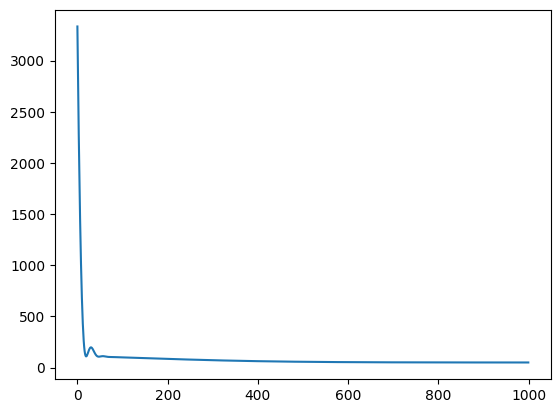

In [48]:
plt.plot(hist)
plt.show()

In [49]:
model[0].weight

Parameter containing:
tensor([[2.9254]], requires_grad=True)

In [50]:
model[0].bias

Parameter containing:
tensor([-15.1101], requires_grad=True)

In [51]:
# model( torch.FloatTensor([[15]]))
pred = model(x).detach().numpy()

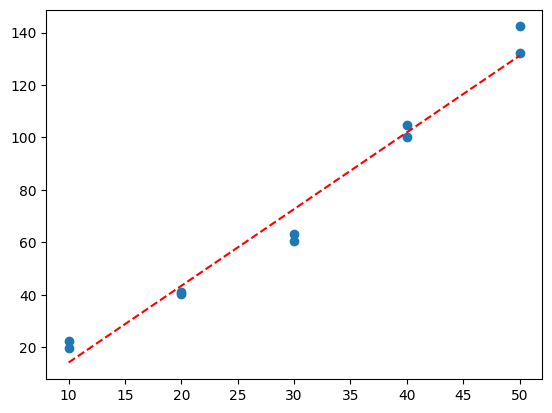

In [52]:
plt.scatter(x, y)
plt.plot(x, pred, 'r--') # r-- : Red, dashed line
plt.show()